In [14]:
#1. import dependencies
import h5py
import matplotlib.pyplot as plt
import numpy as np
import numpy
import glob

from sklearn import metrics
from sklearn.cluster import DBSCAN

import galpy
from galpy.actionAngle import estimateDeltaStaeckel
from galpy.actionAngle import actionAngleStaeckel
from galpy.actionAngle import actionAngleIsochrone
import galpy.potential
from galpy.potential import IsochronePotential
from galpy.potential import MWPotential2014 

from astropy import units

import agama

import pickle

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.cluster import DBSCAN, HDBSCAN

In [15]:
files={}
for filepath in glob.iglob('./historic_streams/z0_objects/*25*'):
    files[filepath[len(filepath)-7:][:-5]]=h5py.File(filepath)
    print(filepath)
files

./historic_streams/z0_objects/particles_within_Rvir_object_25.hdf5


{'25': <HDF5 file "particles_within_Rvir_object_25.hdf5" (mode r)>}

<>:48: SyntaxWarning: invalid escape sequence '\o'

<>:48: SyntaxWarning: invalid escape sequence '\o'

/var/folders/cs/cpwlb8215w7_8nfgdjnp7y400000gn/T/ipykernel_42524/1874650237.py:48: SyntaxWarning: invalid escape sequence '\o'
  ax[1].set_title(r'Edge-on Surface Density for Object ' + str(file) +  ' [$M_\odot/\mathsf{kpc}^2$]', fontsize = font_size2)

units: {'length': <Quantity 1. kpc>, 'velocity': <Quantity 1. km / s>, 'time': <Quantity 977.79222168 Myr>, 'mass': <Quantity 1.e+10 solMass>}, G=43009.2


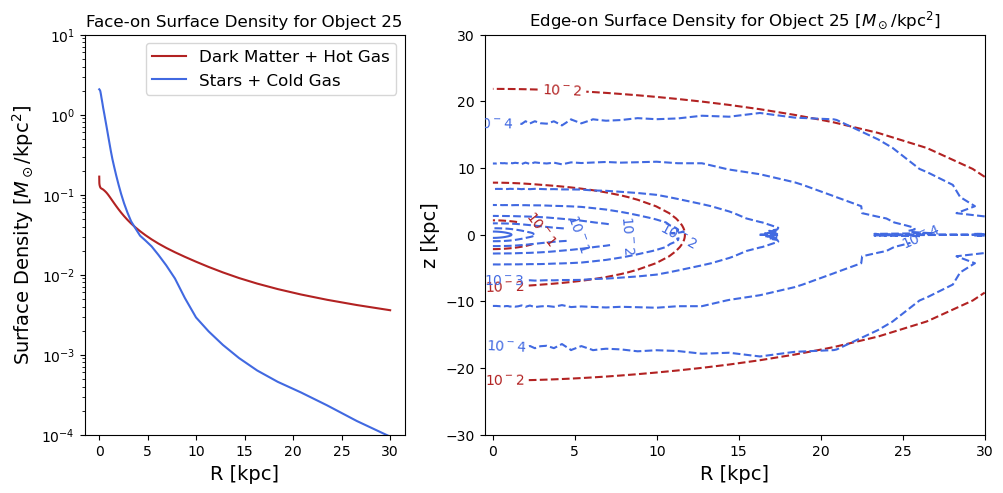

In [36]:
#plot potentials

pot_cylspline = agama.GalpyPotential('/Users/benjaminhanf/Desktop/pomona_s25/thesis/pipeline/to_green_planet/25/pot_cylspline_25')
pot_multipole = agama.GalpyPotential('/Users/benjaminhanf/Desktop/pomona_s25/thesis/pipeline/to_green_planet/25/pot_multipole_25')

agama.setUnits(length=1, velocity=1, mass=1e10)
print("units: %s" % agama.getUnits() + ", G=%g" % agama.G)

font_size1 = 14
font_size2 = 12

for file in files:
    
    # pot_total = agama.Potential(pot_cylspline, pot_multipole)
    pot_total = agama.Potential("/Users/benjaminhanf/Desktop/pomona_s25/thesis/pipeline/to_green_planet/25/25/pot_total_25")
    pot_names = ['Dark Matter + Hot Gas', 'Stars + Cold Gas']

    solarRadius = 8.0  # kpc

    gridR = agama.nonuniformGrid(50, 0.01, 30.0)
    gridR00 = numpy.column_stack((gridR, gridR*0, gridR*0))    # for the radial profile at z=0
    gridz   = agama.symmetricGrid(50, 0.01, 30)
    gridR0z = numpy.column_stack((gridz*0 + solarRadius, gridz*0, gridz))  # for the vertical profile at solar radius

    grid2R, grid2z = numpy.meshgrid(gridR, gridz)  # two 2d arrays of shape (len(gridR), len(gridz))
    gridRz = numpy.column_stack((grid2R.reshape(-1), grid2z.reshape(-1)))  # array of shape (len(gridR)*len(gridz), 2)
    gridR0 = numpy.column_stack((gridR, gridR*0))  # array of shape (len(gridR), 2)  for the 1d profile

    plt.figure(figsize=(10,5))
    ax=[plt.axes([0.08,0.1,0.32,0.8]), plt.axes([0.48,0.1,0.5,0.8])]
    for i in range(len(pot_total)):
        # face-on, 1d profile
        ax[0].plot(gridR, pot_total[i].projectedDensity(gridR0, beta=0), label=pot_names[i], c=['firebrick', 'royalblue'][i])
        # edge-on, 2d contour plot
        Sigma = pot_total[i].projectedDensity(gridRz, beta=numpy.pi/2).reshape(grid2R.shape)
        ax[1].clabel(ax[1].contour(grid2R, grid2z, numpy.log10(Sigma), levels=numpy.linspace(-4.1, 0, 8),
            colors=['firebrick', 'royalblue'][i]), fmt='$10^%.0f$')
    
    ax[0].set_xlabel('R [kpc]', fontsize = font_size1)
    ax[0].set_ylabel(r'Surface Density [$M_\odot/\mathsf{kpc}^2$]', fontsize = font_size1)
    ax[0].set_title('Face-on Surface Density for Object '  + str(file), fontsize = font_size2)
    ax[0].set_yscale('log')
    ax[0].set_ylim(1e-4,1e1)
    ax[0].legend(loc='upper right', fontsize = font_size1 - 2)
    ax[1].set_xlim(-0.5, 30)
    ax[1].set_xlabel('R [kpc]', fontsize = font_size1)
    ax[1].set_ylabel('z [kpc]', fontsize = font_size1)
    ax[1].set_title(r'Edge-on Surface Density for Object ' + str(file) +  ' [$M_\odot/\mathsf{kpc}^2$]', fontsize = font_size2)
    None

    plt.savefig('./draft_aligned_surface_density_light_' + str(file) + '.jpg', dpi = 300)
    
    plt.show()

    plt.style.use('default')